# Importing the pre-requisites and global variables

In [1]:
import numpy as np
from keras.models import load_model
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
import matplotlib.pyplot as plt
import csv
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
IMG_SIZE = 256
BATCH_SIZE = 32
TRAIN_SPLIT = 0.7
VALID_SPLIT = 0.2
TEST_SPLIT = 0.1

***

# Configuring the datasets

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Datasets/train/",
    shuffle = True,
    image_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE
)

Found 43030 files belonging to 39 classes.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Datasets/val/",
    shuffle= True,
    image_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE
)

Found 12289 files belonging to 39 classes.


In [5]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Datasets/test/",
    shuffle= False,
    image_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE
)

Found 6167 files belonging to 39 classes.


In [17]:
cls_names = train_ds.class_names
print(cls_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl

In [7]:
len(train_ds)

1345

In [8]:
len(val_ds)

385

In [9]:
len(test_ds)

193

***

# Storing the truth value of the test dataset

In [10]:
y_true = []

print(len(test_ds))

cnt = 0

for i, j in test_ds:
  for k in range(len(j)):
    y_true.append(cls_names[j[k].numpy()])
  cnt += 1

193


In [11]:
y_true

['Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___A

In [17]:
y_True = np.array(y_true)
y_True

array(['Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab',
       ..., 'Tomato___healthy', 'Tomato___healthy', 'Tomato___healthy'],
      dtype='<U45')

In [18]:
type(y_True)

numpy.ndarray

In [19]:
with open('test_ds_truthval.csv', 'w', newline='') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(y_True)

***

# Preproccessing the datasets

In [12]:
rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

***

# Building the CNN model

In [13]:
detModel = models.Sequential([
    rescale,

    layers.Conv2D(256, (3,3), activation = 'relu', input_shape = (BATCH_SIZE, IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(39, activation='softmax'),

])

detModel.build(input_shape = (BATCH_SIZE, IMG_SIZE, IMG_SIZE, 3))

In [14]:
detModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 128)        

In [15]:
detModel.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history = detModel.fit(
    train_ds,
    epochs = 20,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds,
    validation_split = 0.3
)

***

# Testing and Results

In [6]:
detModel = load_model('../Code/plantdetection7.h5')

In [22]:
scores = detModel.evaluate(test_ds)

193/193 [==============================] - 489s 3s/step - loss: 0.0551 - accuracy: 0.9831


In [7]:
pred = detModel.predict(test_ds)

193/193 [==============================] - 477s 2s/step


In [27]:
scores

[0.05505714938044548, 0.9831360578536987]

In [8]:
pred_arg = np.argmax(pred, axis=1)
print(pred_arg)

[ 0  0 17 ... 38 38 38]


***

# Performance Matrix for the Test Dataset

In [9]:
df = pd.read_csv('test_ds_truthval.csv')
df

,Truth_Values
0,Apple___Apple_scab
1,Apple___Apple_scab
2,Apple___Apple_scab
3,Apple___Apple_scab
4,Apple___Apple_scab
...,...
6162,Tomato___healthy
6163,Tomato___healthy
6164,Tomato___healthy
6165,Tomato___healthy


In [10]:
df["Truth_Values"].value_counts()

Truth_Values
Orange___Haunglongbing_(Citrus_greening)         552
Tomato___Tomato_Yellow_Leaf_Curl_Virus           537
Soybean___healthy                                509
Peach___Bacterial_spot                           231
Tomato___Bacterial_spot                          214
Tomato___Late_blight                             192
Squash___Powdery_mildew                          184
Tomato___Septoria_leaf_spot                      178
Tomato___Spider_mites Two-spotted_spider_mite    168
Apple___healthy                                  165
Tomato___healthy                                 160
Blueberry___healthy                              151
Pepper,_bell___healthy                           149
Tomato___Target_Spot                             142
Grape___Esca_(Black_Measles)                     139
Corn___Common_rust                               120
Grape___Black_rot                                118
Corn___healthy                                   117
Background_without_leaves        

In [11]:
le = LabelEncoder()
print(le)

LabelEncoder()


In [12]:
df["Truth_Values"] = le.fit_transform(df["Truth_Values"])
df

,Truth_Values
0,0
1,0
2,0
3,0
4,0
...,...
6162,38
6163,38
6164,38
6165,38


In [13]:
y_truth = df["Truth_Values"].to_numpy()

In [14]:
cm = confusion_matrix(y_truth, pred_arg)
print(cm)

[[ 98   0   0 ...   0   0   0]
 [  0 100   0 ...   0   0   0]
 [  0   0 100 ...   0   0   0]
 ...
 [  0   0   0 ... 537   0   0]
 [  0   0   0 ...   0 100   0]
 [  0   0   0 ...   0   0 160]]


In [15]:
print(classification_report(y_truth, pred_arg))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       1.00      1.00      1.00       100
           2       0.99      1.00      1.00       100
           3       0.99      0.99      0.99       165
           4       0.98      1.00      0.99       115
           5       0.97      1.00      0.99       151
           6       0.98      1.00      0.99       106
           7       0.99      1.00      1.00       100
           8       0.90      0.93      0.92       100
           9       1.00      1.00      1.00       120
          10       0.95      0.90      0.92       100
          11       1.00      1.00      1.00       117
          12       1.00      0.99      1.00       118
          13       0.99      1.00      0.99       139
          14       0.99      1.00      1.00       108
          15       0.99      0.98      0.98       100
          16       1.00      1.00      1.00       552
          17       0.96    

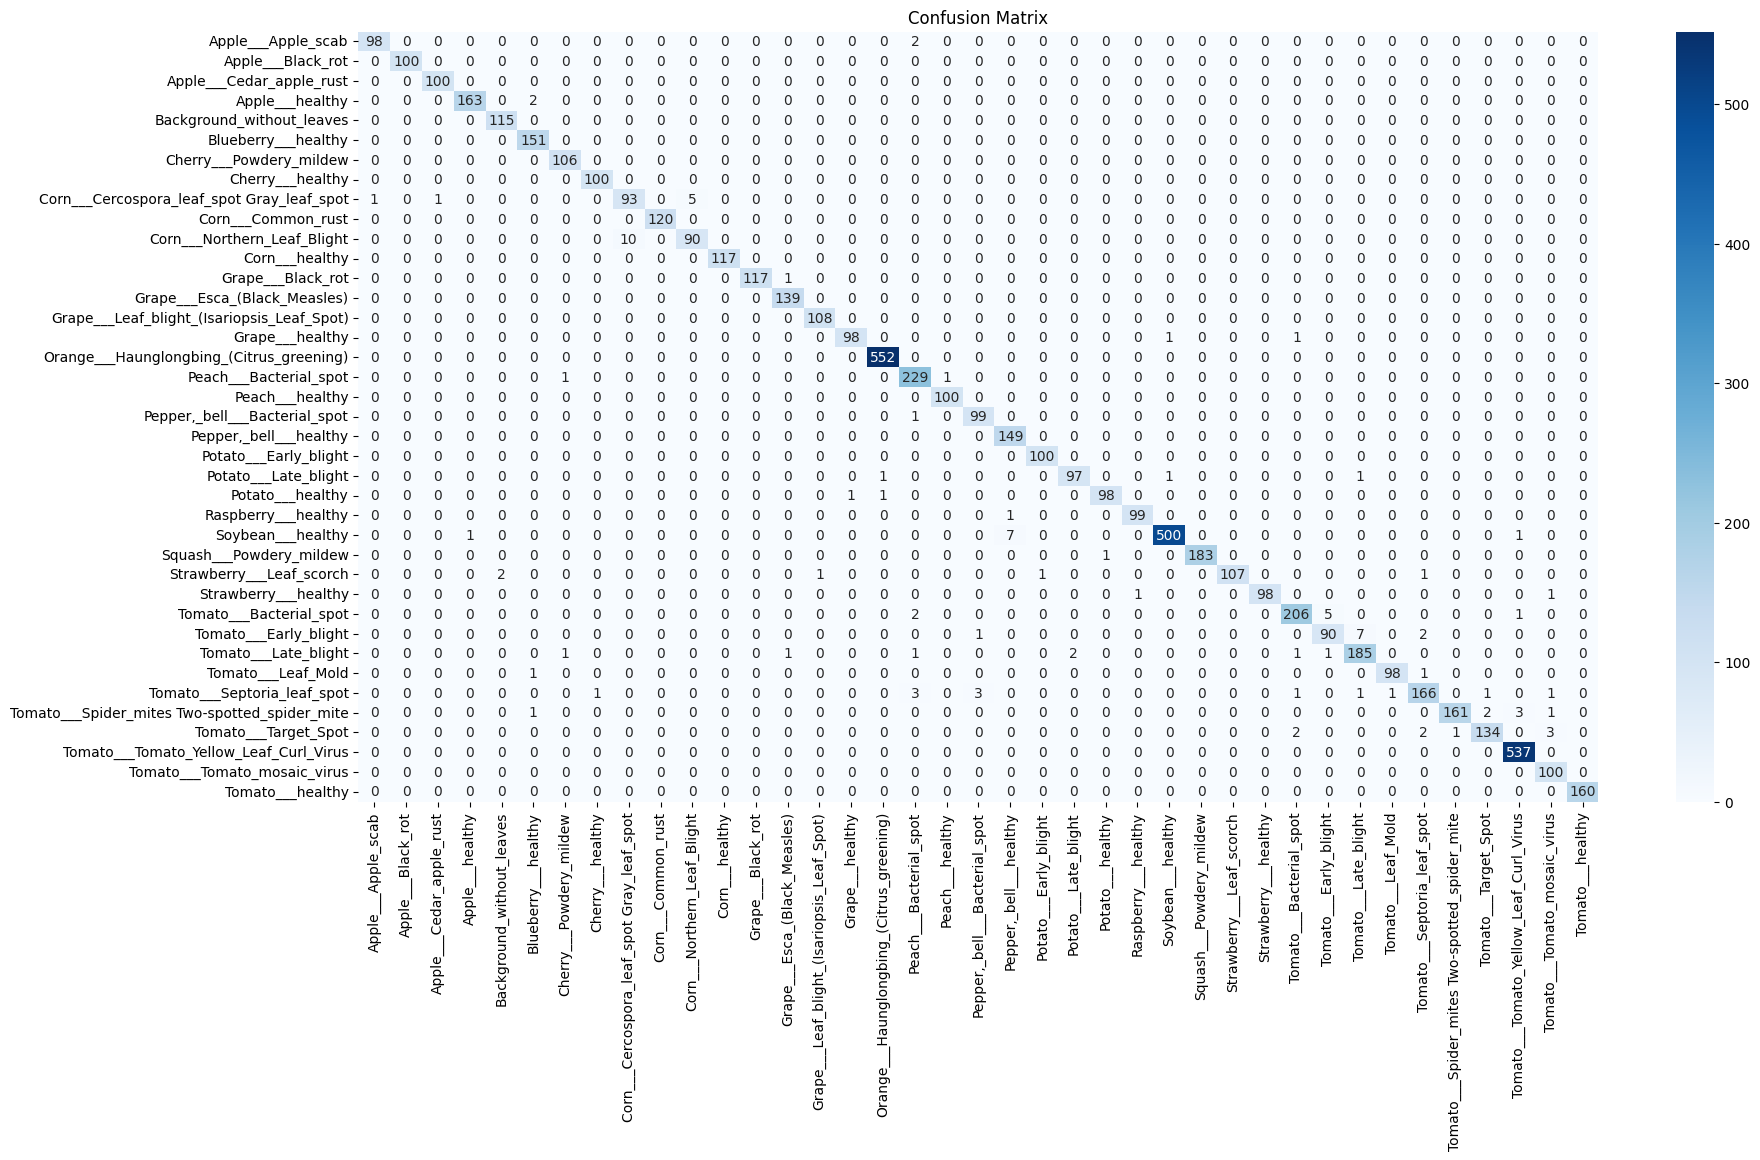

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, fmt=".3g", cmap='Blues', xticklabels=cls_names, yticklabels=cls_names)
plt.title('Confusion Matrix')
plt.savefig('HeatMap.png', bbox_inches = 'tight')

In [17]:
accuracy_score(y_truth, pred_arg)

0.9831360467001784

In [18]:
recall_score(y_truth, pred_arg, average='macro')

0.9806083307241459

In [19]:
precision_score(y_truth, pred_arg, average='macro')

0.9808365238209811

In [21]:
f1_score(y_truth, pred_arg, average='macro')

0.9805830450287729